# Partie 1 : Analyse Exploratoire des Données (EDA)

## 1.1 Vue d'ensemble des données :

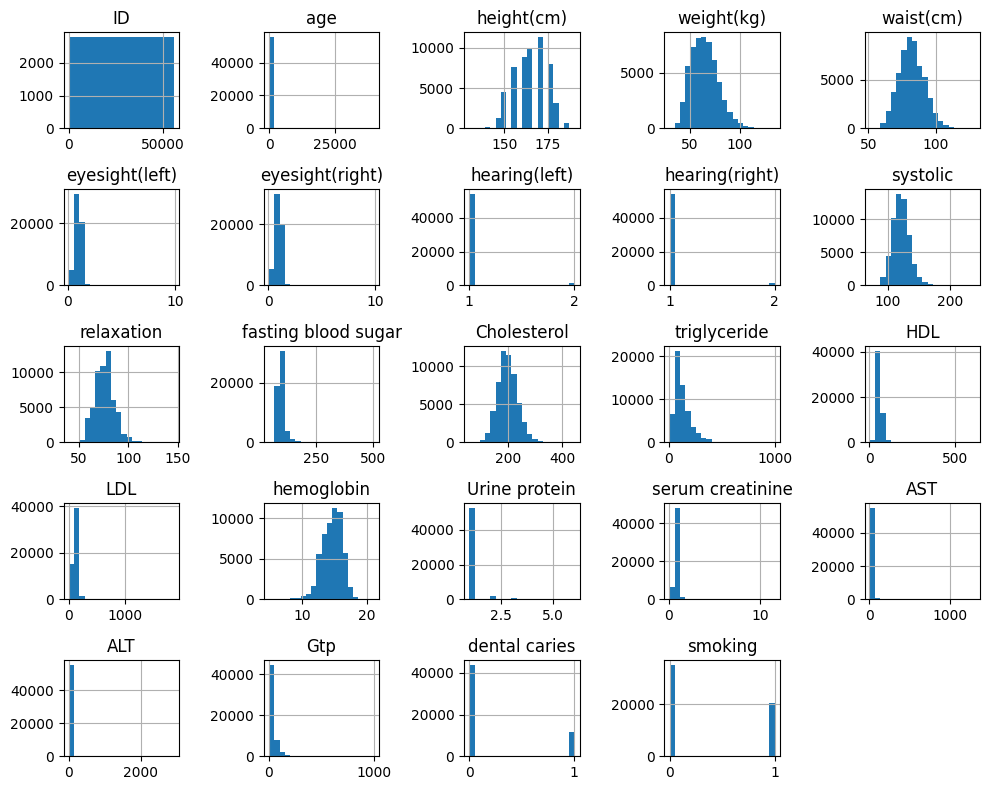

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt

def show_dataframe_in_window(df):
    root = tk.Tk()
    root.title("DataFrame Viewer")

    # Create a frame for the DataFrame
    frame = ttk.Frame(root)
    frame.pack(fill=tk.BOTH, expand=True)

    # Create a Treeview widget
    tree = ttk.Treeview(frame)
    tree.pack(fill=tk.BOTH, expand=True)

    # Define columns
    tree["columns"] = list(df.columns)
    tree["show"] = "headings"

    # Create headings
    for column in df.columns:
        tree.heading(column, text=column)

    # Add data to the tree
    for index, row in df.iterrows():
        tree.insert("", "end", values=list(row))

    # Start the Tkinter main loop
    root.mainloop()

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
#Counts number of columns
shape = df.shape
Column_number = shape[1]
print(Column_number)

27


In [ ]:
#Gives names of all columns
list(df.columns.values)

['ID',
 'gender',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'oral',
 'dental caries',
 'tartar',
 'smoking']

In [ ]:
#Gives lenght of the dataframe --> number of values
len(df)

55702

In [ ]:
#data encoding
df['oral'].replace({'Y': '1'}, inplace=True)
df['oral'].replace({'N': '0'}, inplace=True)
df['tartar'].replace({'Y': '1'}, inplace=True)
df['tartar'].replace({'N': '0'}, inplace=True)
df['gender'].replace({'M': '1'}, inplace=True)
df['gender'].replace({'F': '0'}, inplace=True)

print(df)

          ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      0  40.0         155        60.0       81.3             1.2   
1          1      0  40.0         160        60.0       81.0             0.8   
2          2      1  55.0         170        60.0       80.0             0.8   
3          3      1  40.0         165        70.0       88.0             1.5   
4          4      0  40.0         155        60.0       86.0             1.0   
...      ...    ...   ...         ...         ...        ...             ...   
55697  55676      0   NaN         170         NaN       75.0             0.9   
55698  55681      0   NaN         160         NaN       70.0             1.2   
55699  55683      0   NaN         160         NaN       68.5             1.0   
55700  55684      1   NaN         165         NaN       78.0             0.8   
55701  55691      1   NaN         160         NaN       85.0             0.9   

       eyesight(right)  hearing(left)  

In [ ]:
#Returns number of null values
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 12


## 1.2 Statistiques descriptives :

In [ ]:
#Means for smoker
mean_smoker_age = df.loc[(df["smoking"] == 1), 'age'].mean()
mean_smoker_height = df.loc[(df["smoking"] == 1), 'height(cm)'].mean()
mean_smoker_weight = df.loc[(df["smoking"] == 1), 'weight(kg)'].mean()
print(mean_smoker_age)
print(mean_smoker_height)
print(mean_smoker_weight)

43.560813453265546
169.4354010852031
70.95937622213532


In [ ]:
#Valeurs aberrantes
import numpy as np

np.std(df['age'])
#Output : 170 --> there are abnormale values
nb_abnormal = len(df[df['age'] >= 100])
#As we have 4 abnormal values, it's okay to modify them ourselves
df['age'].replace({'180': '18'}, inplace=True)
df['age'].replace({'1200': '21'}, inplace=True)
df['age'].replace({'3000': '30'}, inplace=True)
df['age'].replace({'40000': '40'}, inplace=True)



In [ ]:
#Gives the mean standard deviations
height_std = np.std(df['height(cm)'])
print(height_std) #9.194053318377998
weight_std = np.std(df['weight(kg)'])
print(weight_std) #12.820107340300028
#The std seems reasonable so no aberrant values


9.194053318377998
12.820107340300028


In [ ]:
hemo_std = np.std(df['hemoglobin'])
print(hemo_std) #1.5644617074469538


1.5644617074469538


## 1.3 Distribution de la donnée :

20457
35245


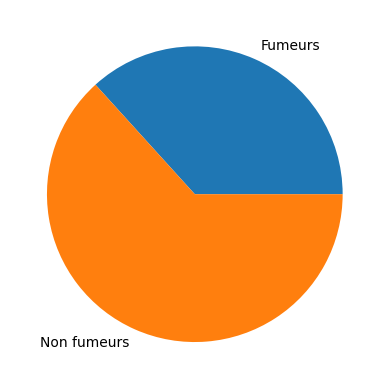

In [ ]:
#Creates a pie chart of the number of smokers and non smokers
import matplotlib.pyplot as plt
import numpy as np

fumeurs = np.sum(df["smoking"] == 1)
non_fumeurs = np.sum(df["smoking"] == 0)
print (fumeurs)
print (non_fumeurs)
y = np.array([fumeurs, non_fumeurs])
mylabels = ["Fumeurs", "Non fumeurs"]

plt.pie(y, labels = mylabels)
plt.show()


859
19598


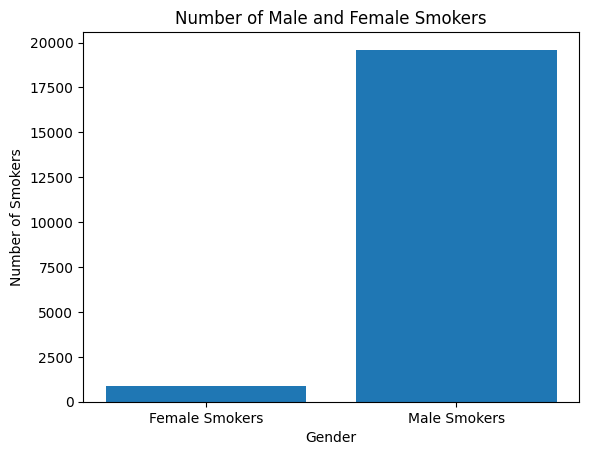

In [ ]:
#Creates an histogram of the number of male and female smokers
import matplotlib.pyplot as plt
import numpy as np

fumeurs_femmes = len(df.loc[(df["smoking"] == 1) & (df["gender"] == '0')])
print(fumeurs_femmes)
fumeurs_hommes = len(df.loc[(df["smoking"] == 1) & (df["gender"] == '1')])
print(fumeurs_hommes)

plt.bar([0, 1], [fumeurs_femmes, fumeurs_hommes])
plt.xticks([0, 1], ['Female Smokers', 'Male Smokers'])
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.title('Number of Male and Female Smokers')

plt.show()


In [ ]:
#Returns the mean age of male smokers
fumeurs_hommes_mean_age = df.loc[(df["smoking"] == 1) & (df["gender"] == '1'), "age"].mean()
print(fumeurs_hommes_mean_age)

43.437005664132265


## 1.4 Analyse de corrélation :

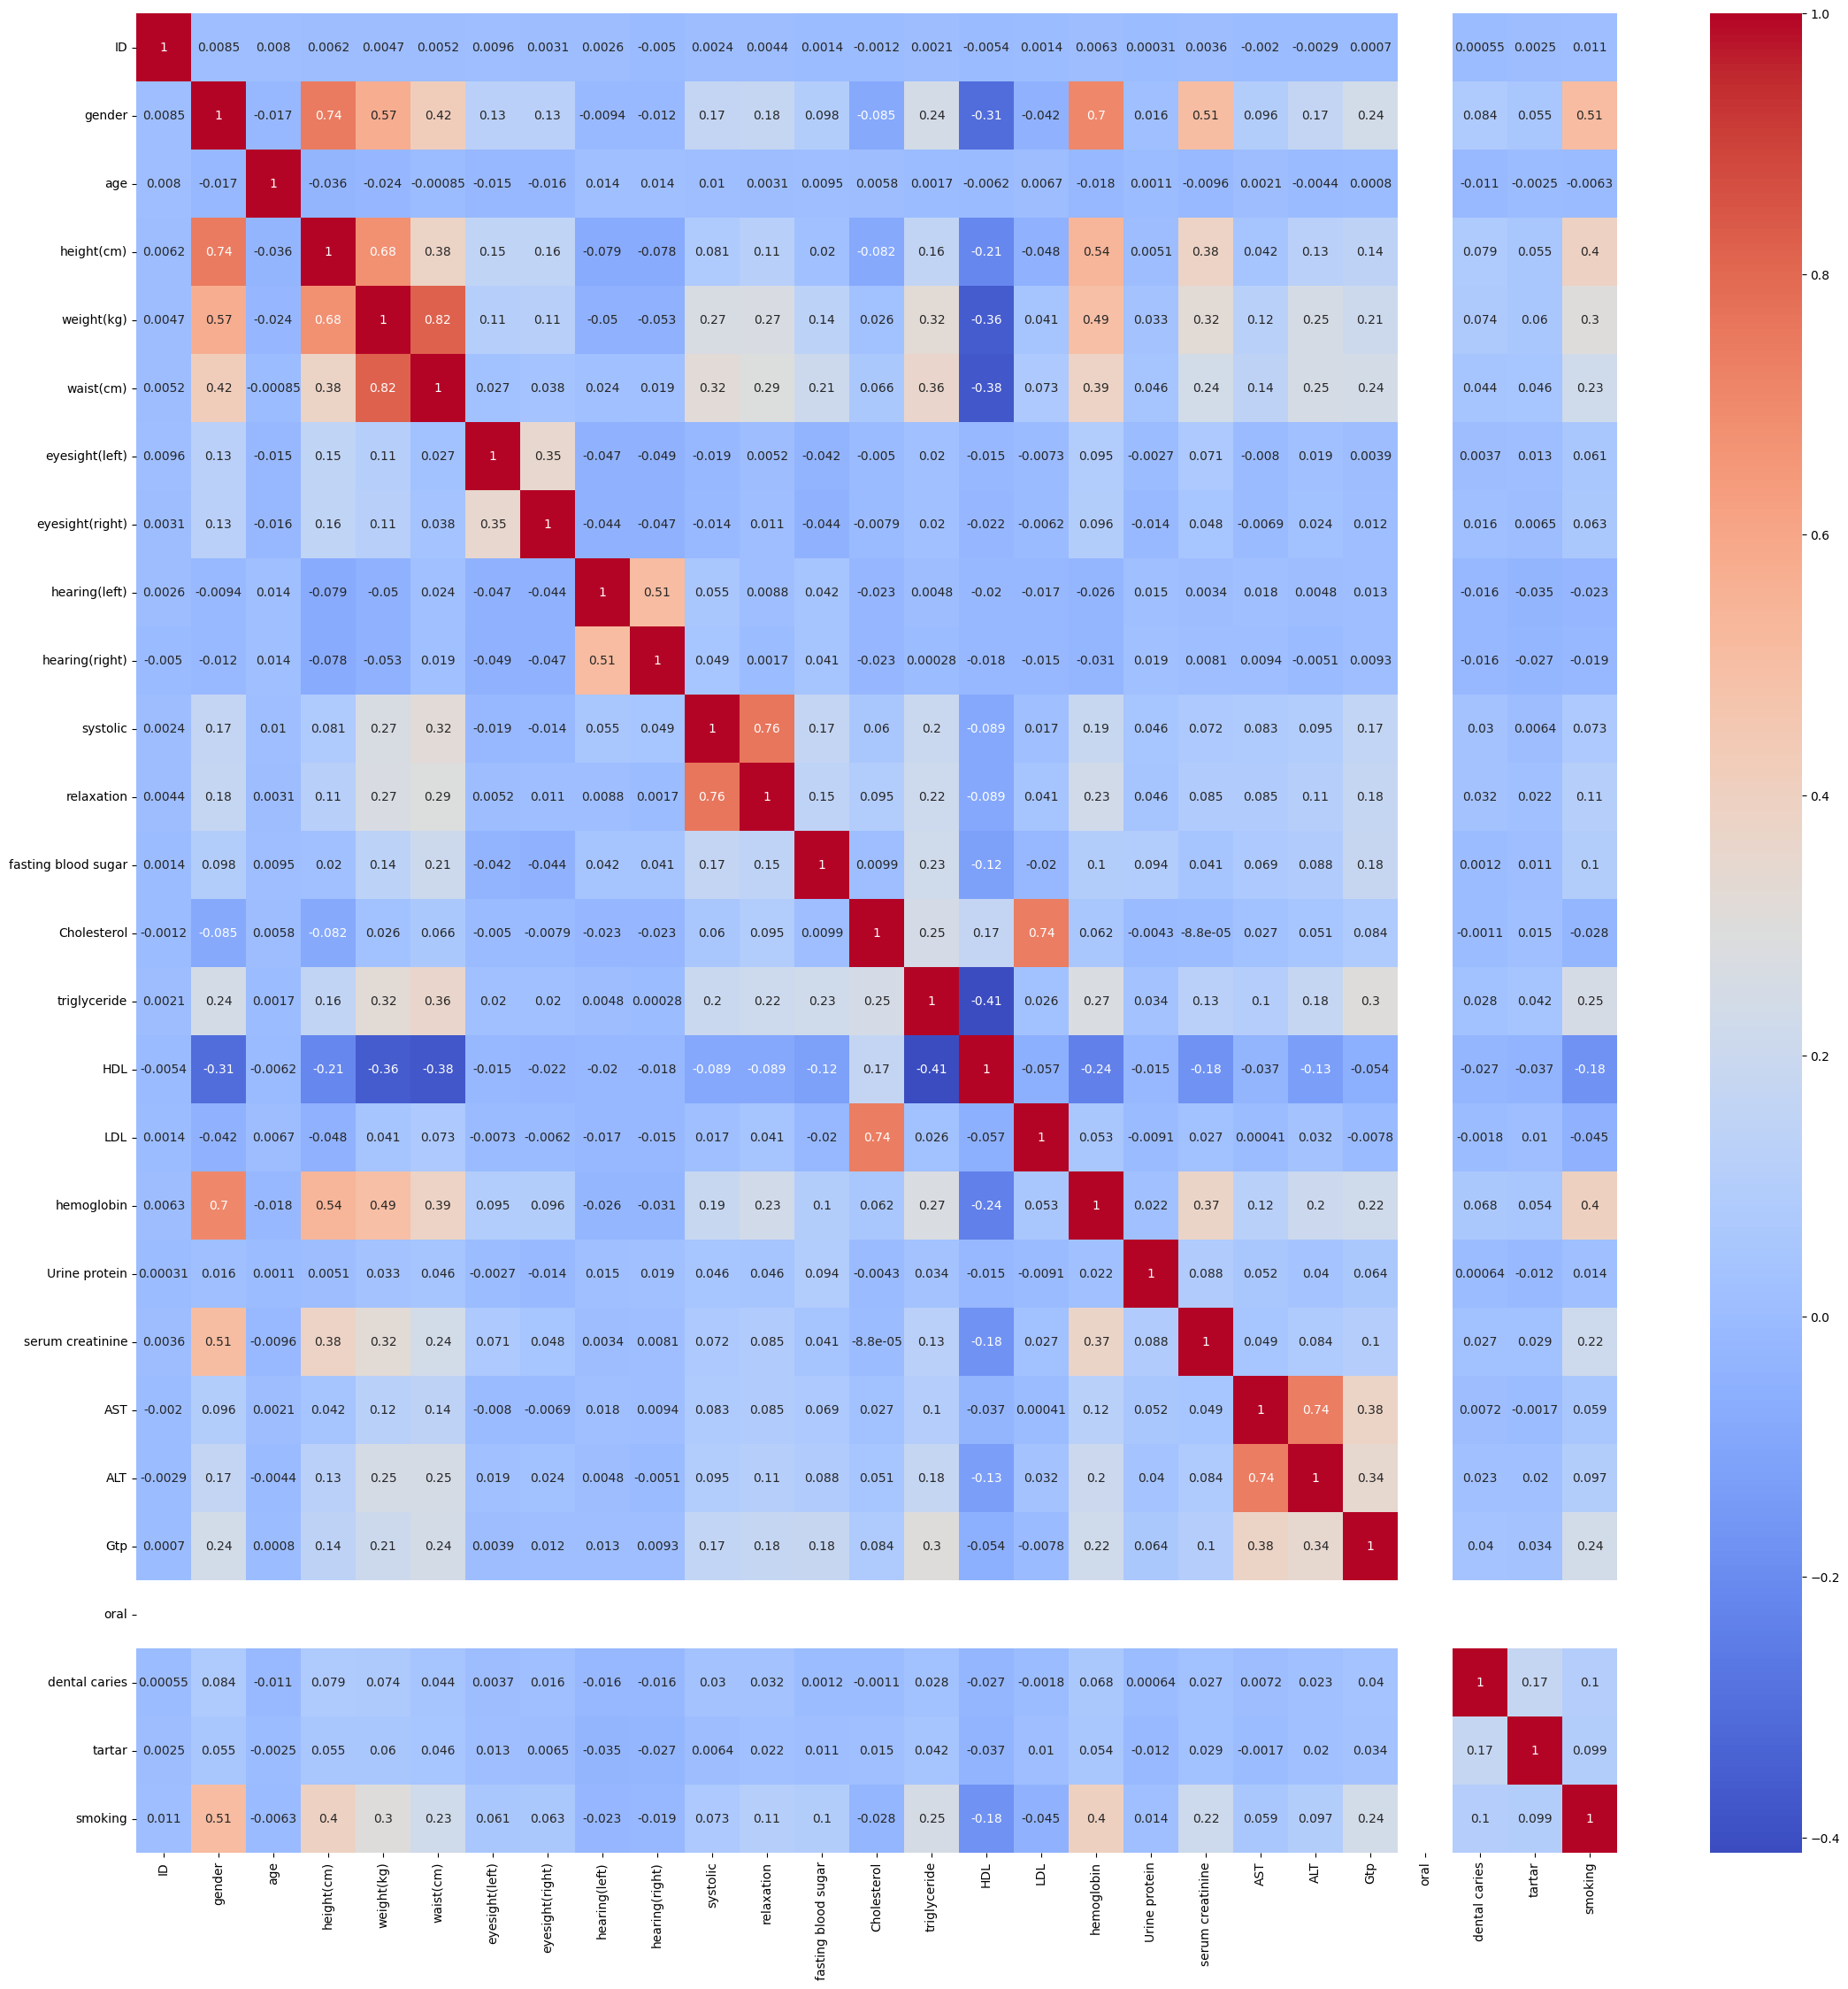

In [ ]:
#Create the correclation heatmap for our dataframe --> no problem because I encoded the values previously
import seaborn as sns

corr = df.corr()

plt.figure(figsize = (27,27))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

The variables gender-height and gender hemoglobin are strongly correlated, which is explained by the biological differences between men and women.

The weight-waist variables are highly correlated, which is explained by the storage of fat at the abdominal belt when an individual gains weight. , or because the individual is taller as observed by the weight-height correlation.

The smoking variable is more strongly correlated with the variables gender, height(cm) and hemoglobin. If we want to confirm or deny these correlations, inferential statistics should be used.

# Partie 2 : Data pre-processing

# 2.1 Gestion des Valeurs Manquantes :

In [ ]:
#Removes the colums containing null values from our datframe --> we don't need them for our model
df_drop = df.dropna(axis='columns')

#Cette méthode retire des colonnes entière de notre jeu de données ce qui retire à la capacité de prédiction
#de nos modèles par la suite. En effet, ils ont moins de catégories à leur disposition pour
#ségréger les données.

# 2.2 Encodage des catégories

In [ ]:
#We encoded the values manually previously but we can do it automatically this way
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


In [ ]:
#Encodes the specified colums
one_hot_encoded_data = pd.get_dummies(df, columns = ['gender', 'oral', 'tartar'])
print(one_hot_encoded_data)

          ID   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0  40.0         155        60.0       81.3             1.2   
1          1  40.0         160        60.0       81.0             0.8   
2          2  55.0         170        60.0       80.0             0.8   
3          3  40.0         165        70.0       88.0             1.5   
4          4  40.0         155        60.0       86.0             1.0   
...      ...   ...         ...         ...        ...             ...   
55697  55676   NaN         170         NaN       75.0             0.9   
55698  55681   NaN         160         NaN       70.0             1.2   
55699  55683   NaN         160         NaN       68.5             1.0   
55700  55684   NaN         165         NaN       78.0             0.8   
55701  55691   NaN         160         NaN       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...   AST  \
0                  1.0            1.0        

In [ ]:
#Reverts the encoding if we need to
### !!! Do not press unless you want to try
df['oral'].replace({'1': 'Y'}, inplace=True)
df['oral'].replace({'0': 'N'}, inplace=True)
df['tartar'].replace({'1': 'Y'}, inplace=True)
df['tartar'].replace({'0': 'N'}, inplace=True)
df['gender'].replace({'1': 'M'}, inplace=True)
df['gender'].replace({'0': 'F'}, inplace=True)
print(df)

In [ ]:
#Here's how to encode it again
df['oral'].replace({'Y': '1'}, inplace=True)
df['oral'].replace({'N': '0'}, inplace=True)
df['tartar'].replace({'Y': '1'}, inplace=True)
df['tartar'].replace({'N': '0'}, inplace=True)
df['gender'].replace({'M': '1'}, inplace=True)
df['gender'].replace({'F': '0'}, inplace=True)
print(df)

          ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      0  40.0         155        60.0       81.3             1.2   
1          1      0  40.0         160        60.0       81.0             0.8   
2          2      1  55.0         170        60.0       80.0             0.8   
3          3      1  40.0         165        70.0       88.0             1.5   
4          4      0  40.0         155        60.0       86.0             1.0   
...      ...    ...   ...         ...         ...        ...             ...   
55697  55676      0   NaN         170         NaN       75.0             0.9   
55698  55681      0   NaN         160         NaN       70.0             1.2   
55699  55683      0   NaN         160         NaN       68.5             1.0   
55700  55684      1   NaN         165         NaN       78.0             0.8   
55701  55691      1   NaN         160         NaN       85.0             0.9   

       eyesight(right)  hearing(left)  

## Partie 3 :

# 3.1 Création de jeu de test et d'entraînement

In [ ]:
#Split data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn

X = df_drop[df_drop.columns.difference(['smoking'])]
y = df_drop['smoking']

X_train, X_test, y_train, y_test  = sklearn.model_selection.train_test_split(X, y, test_size= 0.8, train_size=0.2, random_state=None, shuffle=True, stratify=None)

#How much of the data did you use for training and testing?
#80:20



Il est important de diviser le jeu de données car le modèle ne pourrait s'entrainer en se testant sur des données qu'il à "apprises", ca reviendrait a lui faire ressortir un example bien défini.

# 3.2 Entraînement d'un modèle simple : LogisticRegression

In [ ]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,solver='lbfgs', max_iter=100)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Evaluates the model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))


Accuracy: 0.6939320497284682
Precision: 0.6832598498258525
Recall: 0.6939320497284682
F1 score: 0.6740725575356744


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

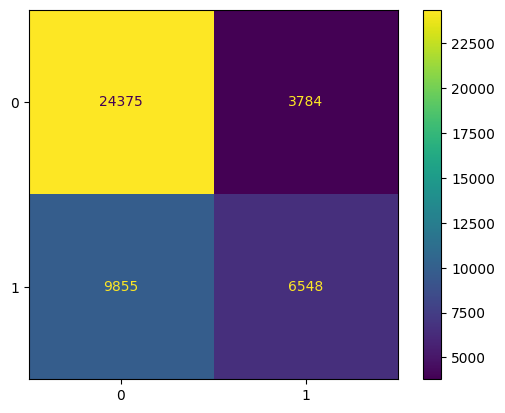

In [ ]:
#Prints the confusion matrix
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1, 2])

cm_display.plot()
plt.show()


<Axes: >

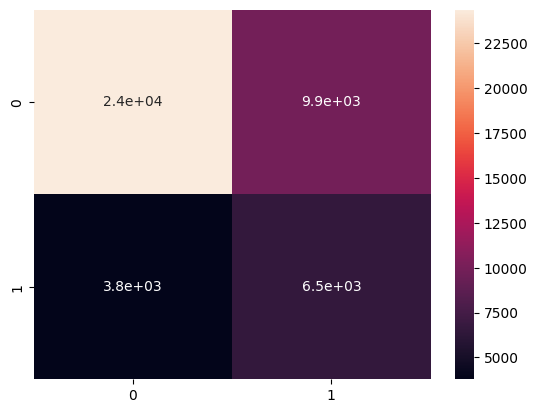

In [ ]:
#Prints the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
confusion_mat_result = confusion_matrix(y_pred, y_test)
import seaborn as sns
sns.heatmap(confusion_mat_result, annot=True)

# 3.3 Entraîner et ajuster les paramètres de plusieurs modèles (En deux sous parties, j'ai commencer par faire sans ajustage pour observer les effets de ce dernier)

In [ ]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_test, y_test)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

Accuracy: 0.7558682285355235
Precision: 0.7710648936098894
Recall: 0.7558682285355235
F1 score: 0.7321230645850235


In [ ]:
#MODELE DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtreeclass = DecisionTreeClassifier(random_state=0)
dtreeclass = dtreeclass.fit(X_train,y_train)
y_pred = dtreeclass.predict(X_test)

print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

Accuracy: 0.69985637987523
Precision: 0.7011251101259081
Recall: 0.69985637987523
F1 score: 0.7004538748628583


In [ ]:
#MODELE RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

Accuracy: 0.7635878102419101
Precision: 0.7663652226944475
Recall: 0.7635878102419101
F1 score: 0.7647174953607435


Log Reg

*   Accuracy: 0.6939320497284682
*   Precision: 0.6832598498258525
*   Recall: 0.6939320497284682
*   F1 score: 0.6740725575356744
---
KNN
*   Accuracy  : 0.7558682285355235
*   Precision: 0.7710648936098894
*   Recall: 0.7558682285355235
*   F1 score: 0.7321230645850235
---
Tree Classifier
*   Accuracy  : 0.69985637987523
*   Precision: 0.7011251101259081
*   Recall: 0.69985637987523
*   F1 score: 0.7004538748628583

---
Random Forest
*   Accuracy  : 0.7635878102419101
*   Precision: 0.7663652226944475
*   Recall: 0.7635878102419101
*   F1 score: 0.7647174953607435

---

From these 4 ones :
*   Highest accuracy : Random Forest
*   Highest precision : KNN
*   Highest recall : Random Forest
*   Highest F1 score : Random forest



---

Here, although the KNN has the highest precision, it is the random forest model that is the most efficient with three metrics higher than the other three models.


**START AGAIN BUT ADJUST HYPERPARAMETERS**



In [ ]:
#KNN MODEL AJUSTEMENT HYPERPARAMETRES
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model_range = list(range(3,15))
parameter_grid = dict(n_neighbors = knn_model_range)

grid_search = GridSearchCV(knn_model, parameter_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
y_pred = best.predict(X_test)

print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

Accuracy: 0.6446523944167677
Precision: 0.6231741911729556
Recall: 0.6446523944167677
F1 score: 0.5659644878019615


In [ ]:
#MODELE DECISION TREE AJUSTE
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 15, 25]
}
parameter_grid = tree_parameters

grid_search = GridSearchCV(tree, parameter_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
y_pred = best.predict(X_test)

print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

Accuracy: 0.7262690184462097
Precision: 0.7322990384618285
Recall: 0.7262690184462097
F1 score: 0.7284831903606721


In [ ]:
#MODELE RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
parameter_grid = random_forest_parameters

grid_search = GridSearchCV(random_forest, parameter_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best = grid_search.best_estimator_
y_pred = best.predict(X_test)

print("Accuracy:", accuracy_score(y_test,
                                  y_pred))

print("Precision:", precision_score(y_test,
                                    y_pred,
                                    average="weighted"))

print('Recall:', recall_score(y_test,
                              y_pred,
                              average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))

Accuracy: 0.7650688927786006
Precision: 0.7687551936892735
Recall: 0.7650688927786006
F1 score: 0.766481480896295


# 3.4 Évaluer les Performances des Modèles

KNN
*   Accuracy  : 0.7558682285355235
*   Precision: 0.7710648936098894
*   Recall: 0.7558682285355235
*   F1 score: 0.7321230645850235
---
KNN ajusté
*   Accuracy  : 0.6440016157264037
*   Precision: 0.6173606911323019
*   Recall: 0.6440016157264037
*   F1 score: 0.5945437935390815
---
Tree Classifier
*   Accuracy  : 0.69985637987523
*   Precision: 0.7011251101259081
*   Recall: 0.69985637987523
*   F1 score: 0.7004538748628583
---
Tree Classifier ajusté
*   Accuracy  : 0.7262690184462097
*   Precision: 0.7322990384618285
*   Recall: 0.7262690184462097
*   F1 score: 0.7284831903606721
---
Random Forest
*   Accuracy  : 0.7635878102419101
*   Precision: 0.7663652226944475
*   Recall: 0.7635878102419101
*   F1 score: 0.7647174953607435
---
Random Forest ajusté
*   Accuracy  : 0.7650688927786006
*   Precision: 0.7687551936892735
*   Recall: 0.7650688927786006
*   F1 score: 0.766481480896295
---

From the 4 initial ones :
*   Highest accuracy : Random Forest
*   Highest precision : KNN
*   Highest recall : Random Forest
*   Highest F1 score : Random forest

From the 4 adjusted ones :
*   Highest accuracy : Random Forest
*   Highest precision : Random Forest
*   Highest recall : Random Forest
*   Highest F1 score : Random forest
---
The choice of our hyperparameters means that KNN loses in performance. This choice may be justified in some cases where the required performance of the model allows to reduce them in order to potentially accelerate its response speed.

The Tree classifier has increased performance due to the adjustment of hyperparameters, and the Random forest remains relatively similar.

After adjusting the hyperparameters, the random forest model is the most efficient.



# 3.5 Echec pour le SVM

In [ ]:
#Tentative avec le modèle SVM mais j'ai pas bien réussi, si je fais trop de neighbors ca prend trop de temps
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

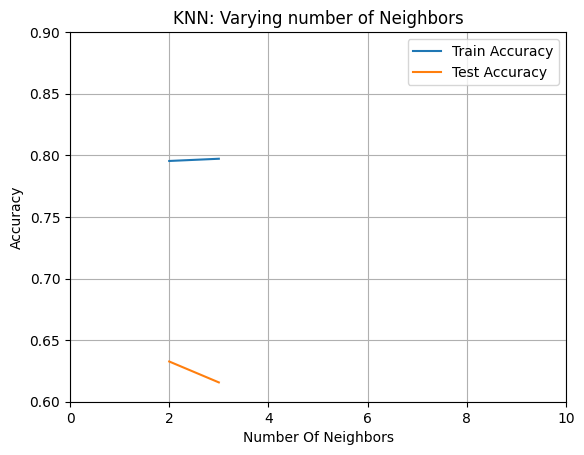

In [ ]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 8, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_score[neighbor]=knn.score(X_train, y_train)
    test_score[neighbor]=knn.score(X_test, y_test)

plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 10)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()